In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The data has 614 rows × 13 columns

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

data has 614 rows × 13 columns out of which 1 is target and remaining are independent variable

In [6]:
data.columns
data.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
#checking the null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There area null values in the data frame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

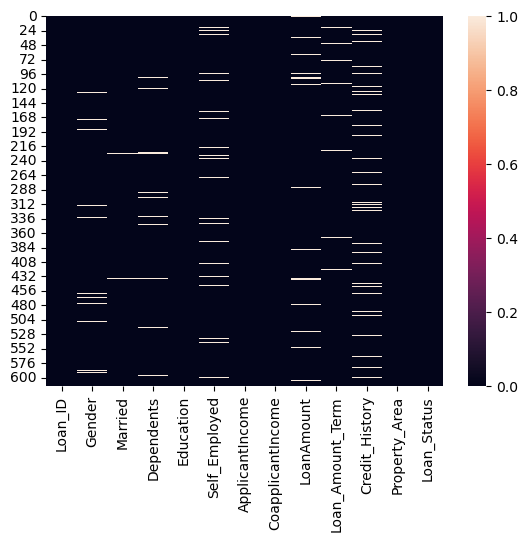

In [9]:
import seaborn as sns
sns.heatmap(data.isnull())

As there is no single colour so there  null values as seen above also

In [12]:
# to check unique vqlues
data['Loan_Status'].unique()


array(['Y', 'N'], dtype=object)

In [13]:
data['Loan_Status'].nunique()# number of unique values


2

In [14]:
data['Property_Area'].nunique()# number of unique values


3

In [15]:
data['Gender'].nunique()# number of unique values

2

In [16]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [17]:
data["Loan_Status"].unique()
data.shape[0]


614

In [18]:
data.loc[data["Loan_Status"]==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


<AxesSubplot:>

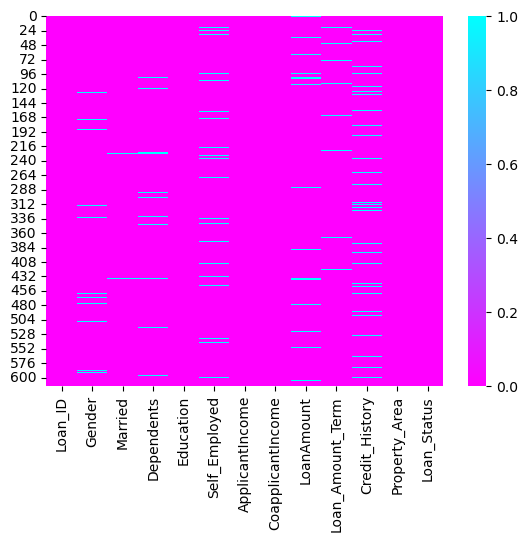

In [19]:
sns.heatmap(data.isnull(),cmap="cool_r")

In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



mean is more than the meadian in applicant income, loan amount

In [21]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [22]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [23]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


 data visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


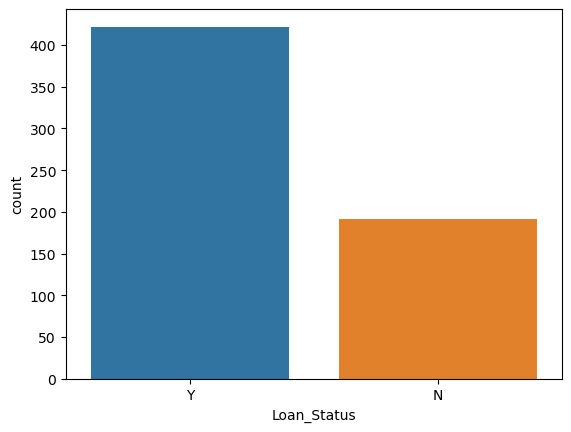

In [24]:

import seaborn as sns

if data["Loan_Status"].notnull().any():
    sns.countplot(x='Loan_Status', data=data)
    print(data["Loan_Status"].value_counts())
else:
    print("The 'Loan_Status' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

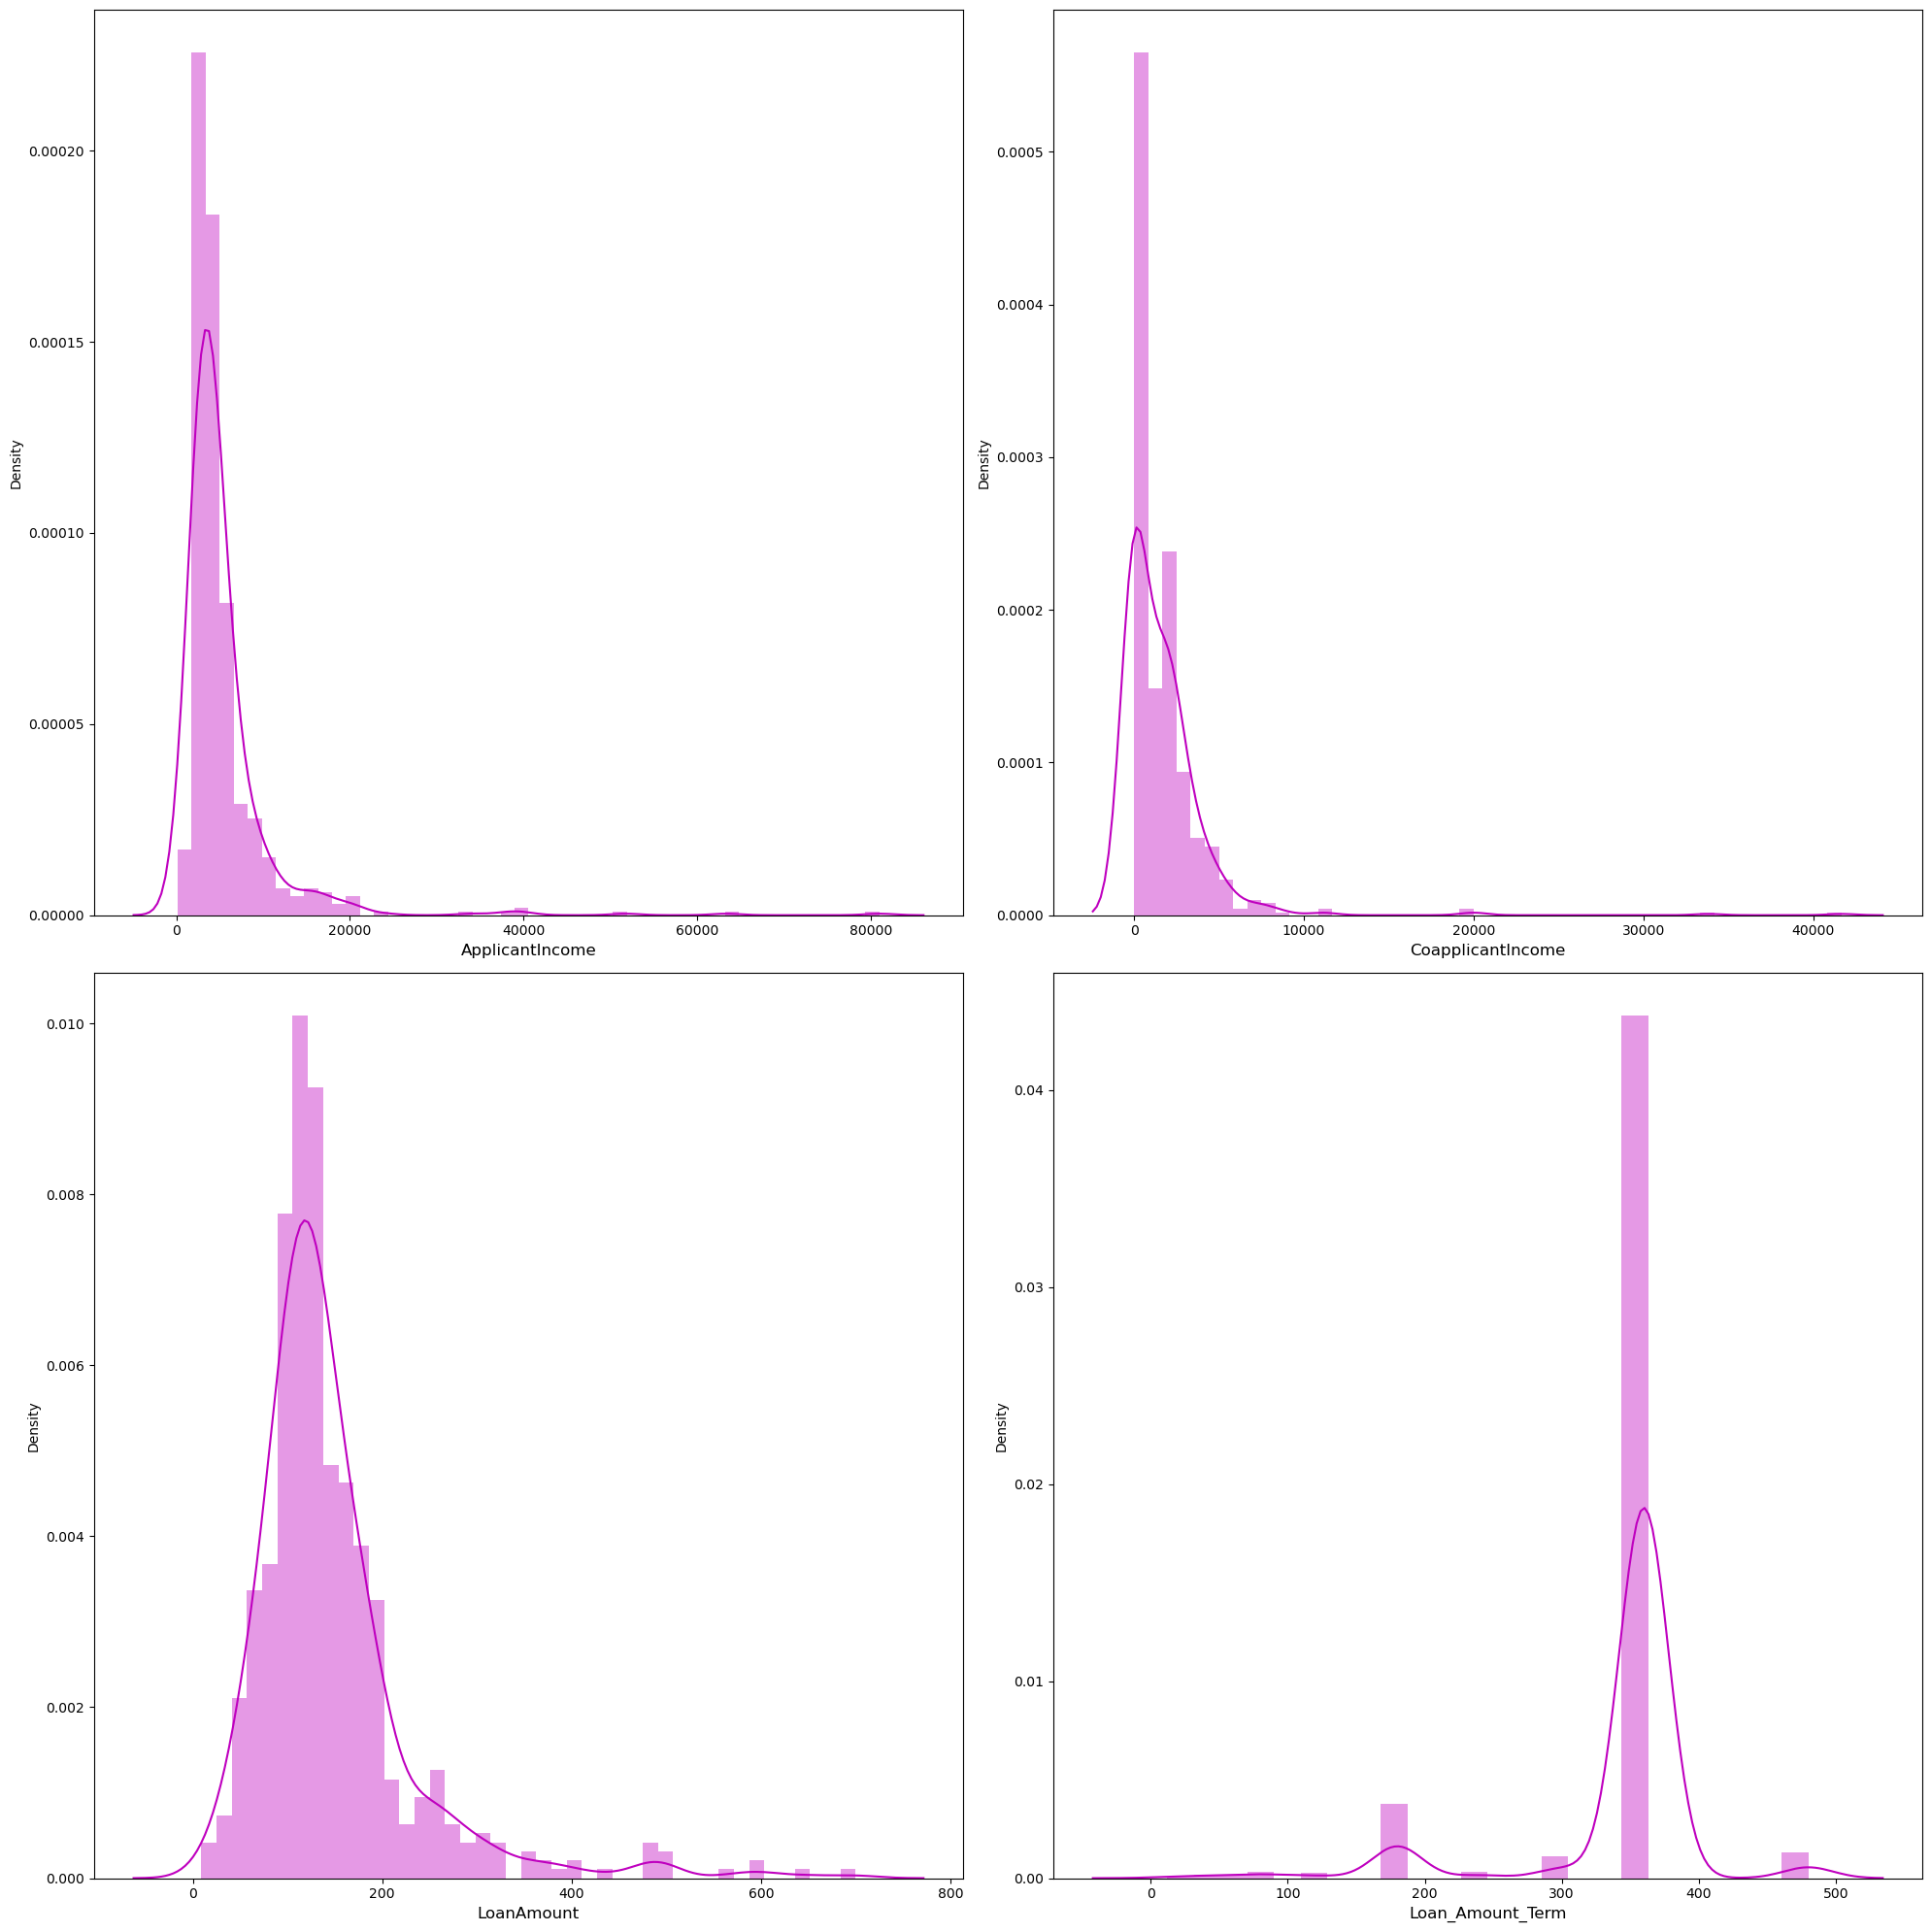

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


loam amount ,applicant income and coapplicant income is skewed  to right

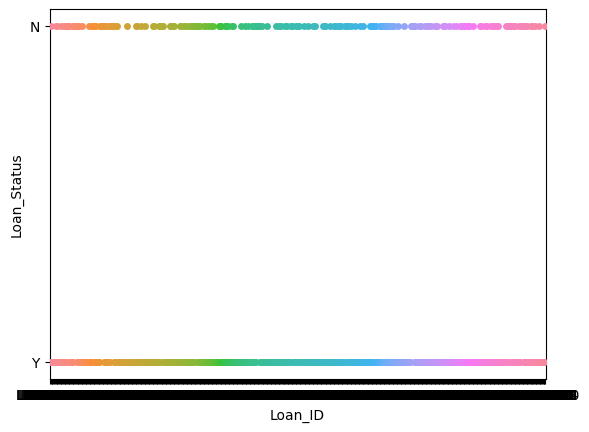

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='Loan_ID', y='Loan_Status',data=data)
plt.show()

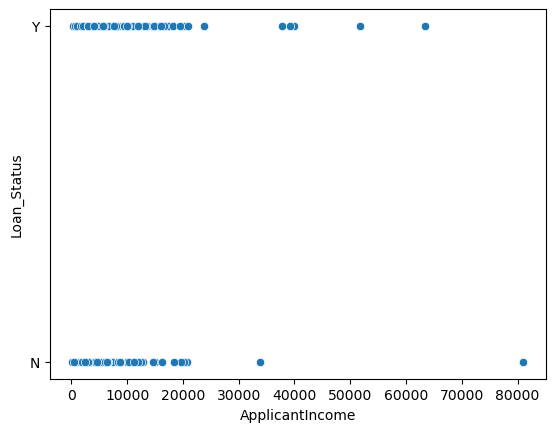

In [28]:
import matplotlib.pyplot as plt
sns.scatterplot(x='ApplicantIncome', y="Loan_Status",data=data)
plt.show()


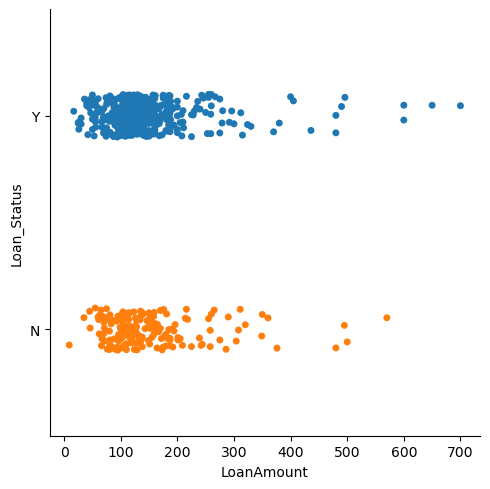

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='LoanAmount', y='Loan_Status', data=data)
plt.show()


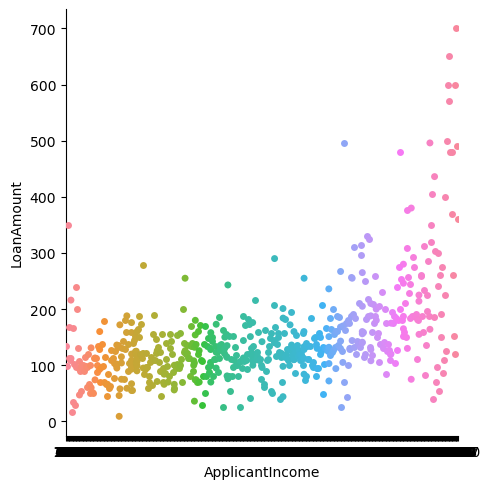

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='ApplicantIncome', y='LoanAmount', data=data)
plt.show()


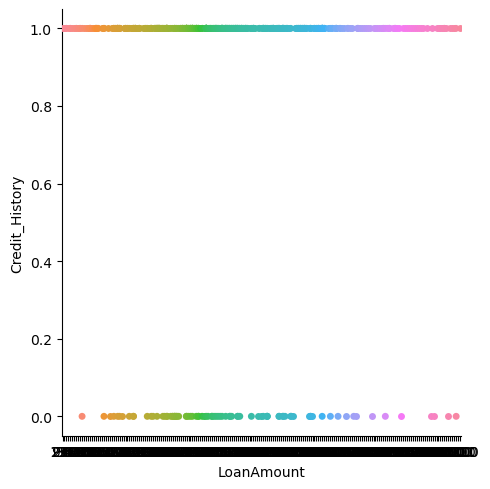

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='LoanAmount', y='Credit_History', data=data)
plt.show()


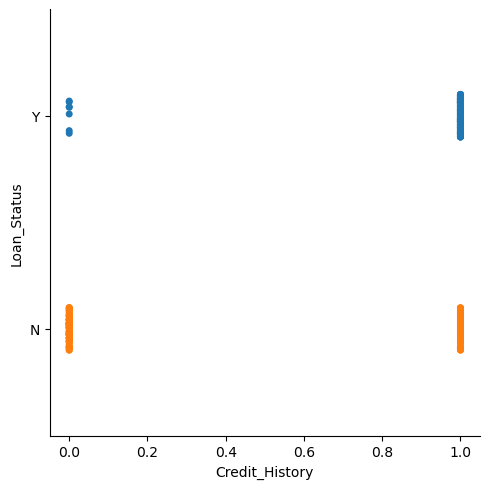

In [32]:
sns.catplot(x='Credit_History', y='Loan_Status', data=data)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


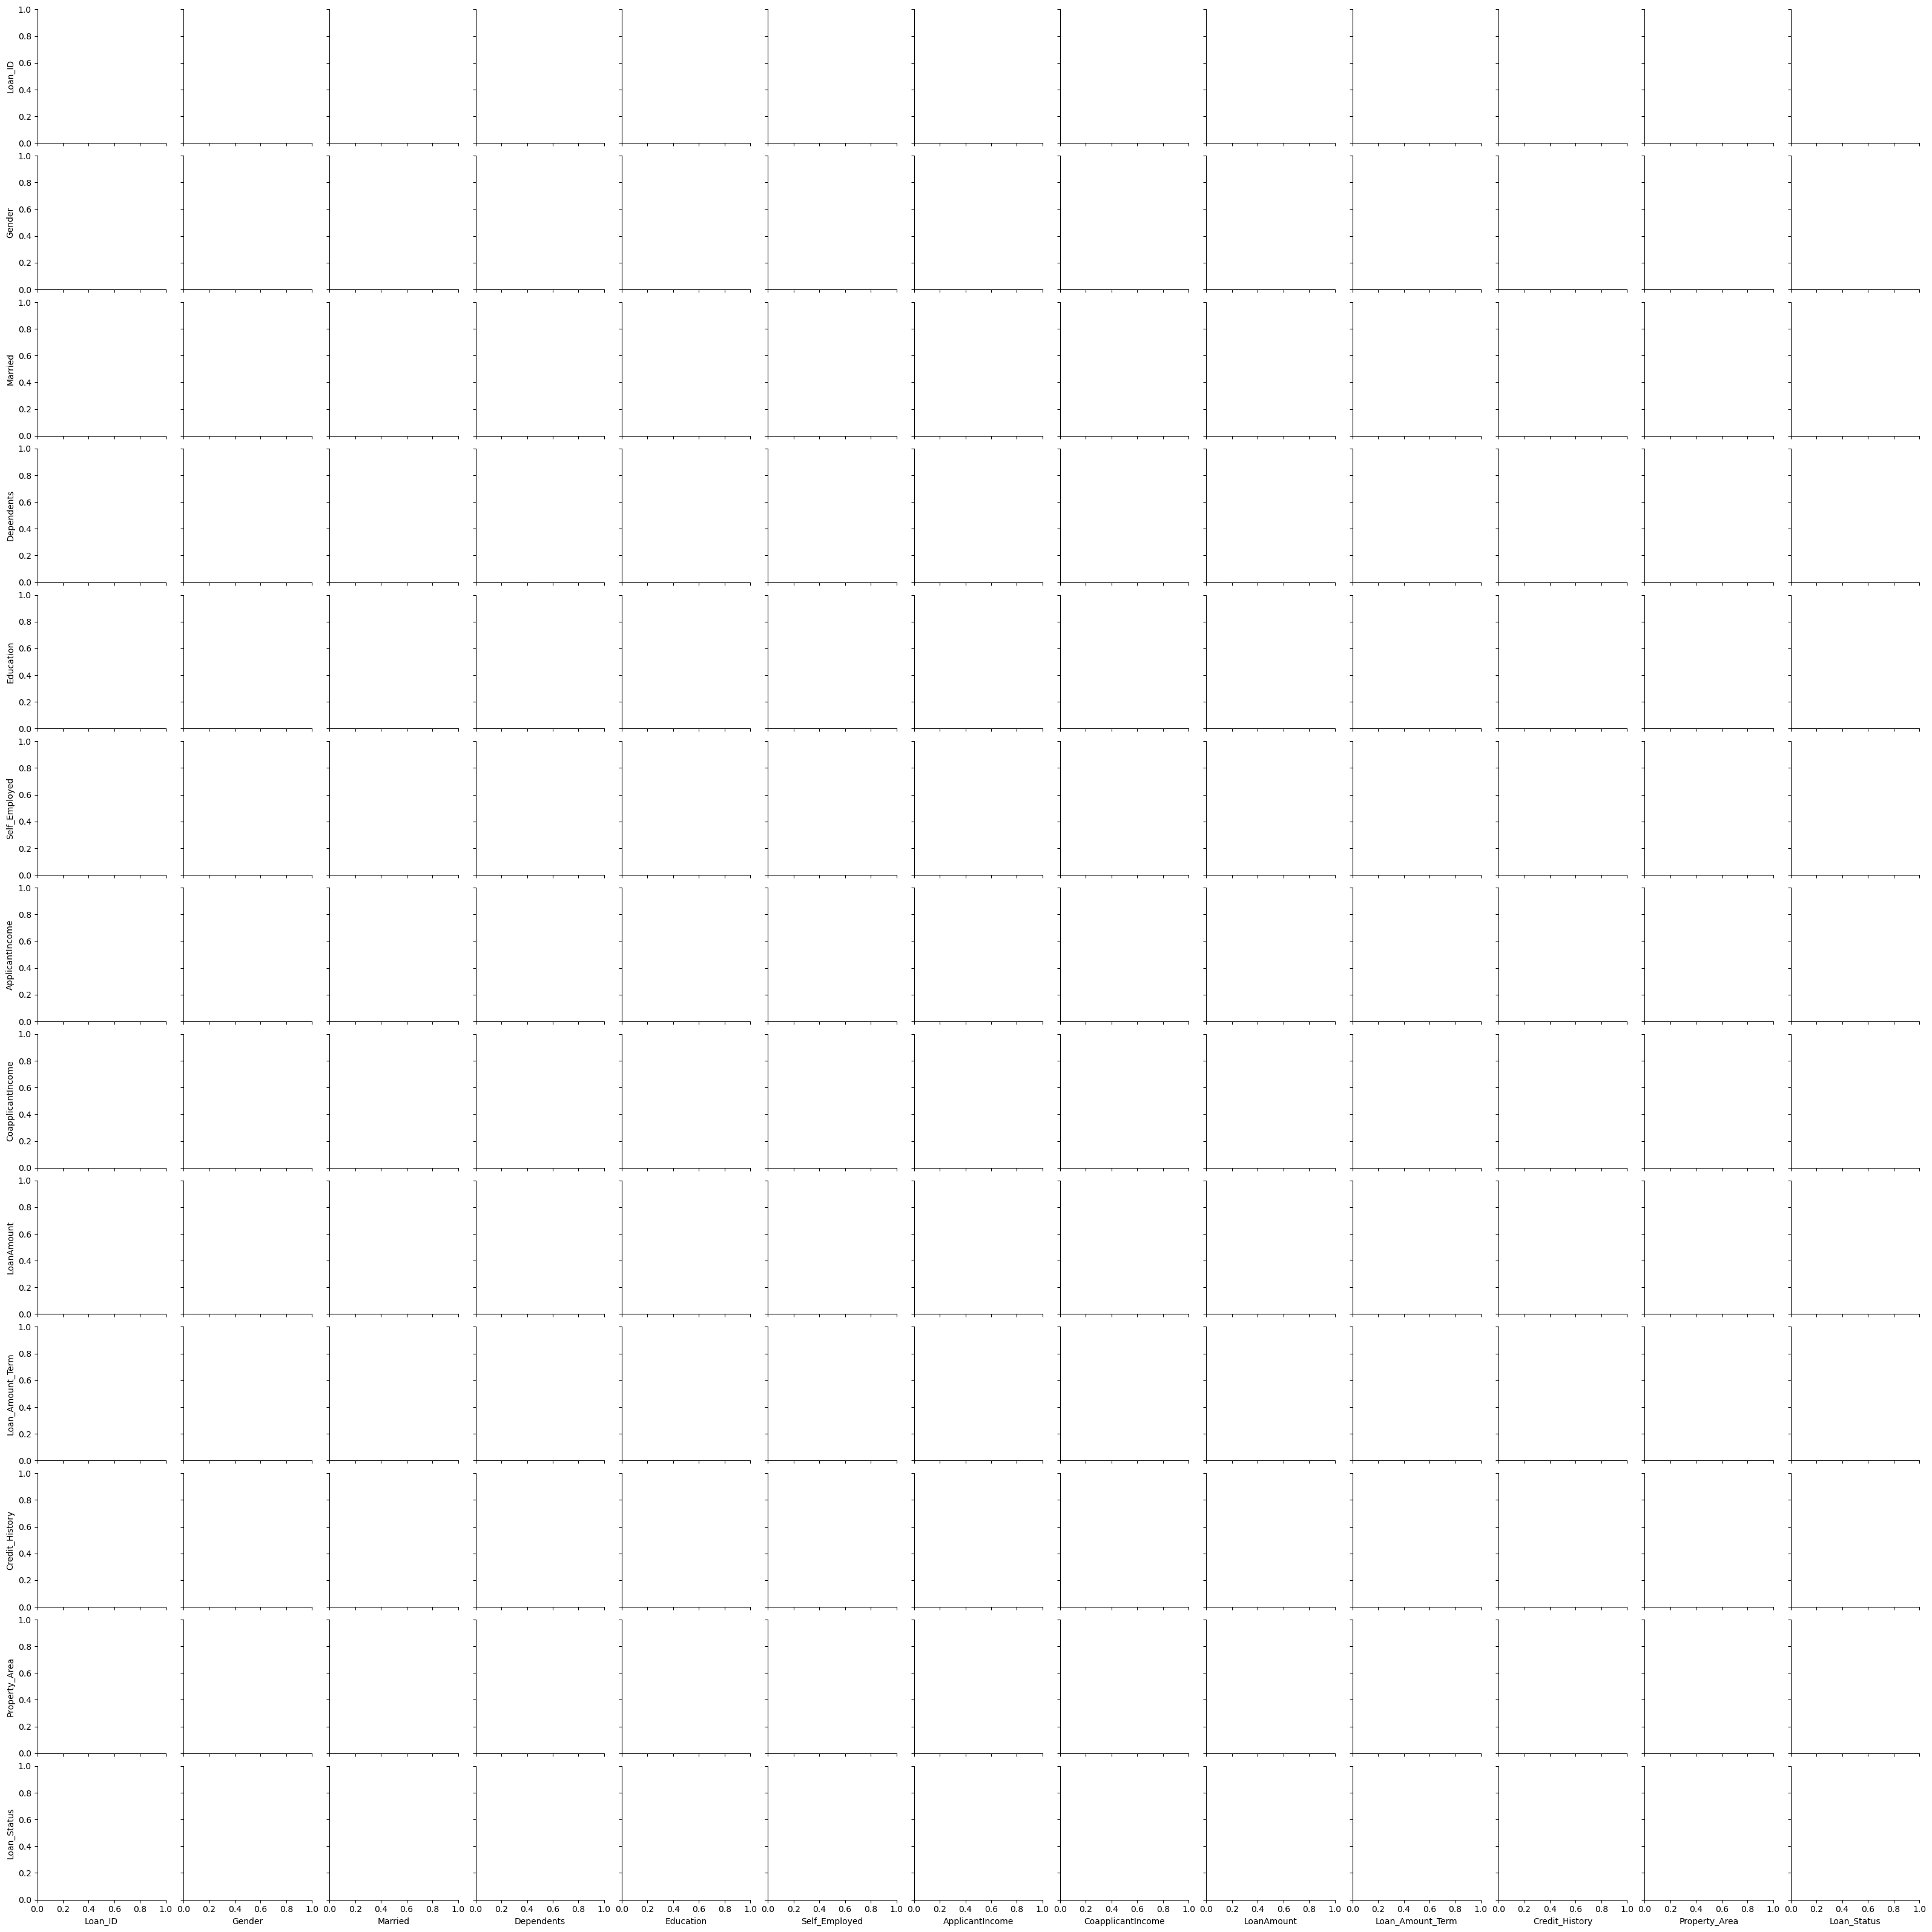

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame based on the condition
subset = data[data['Loan_Status']== 'Yes']

# Create the pairplot
sns.pairplot(subset, palette='Dark2')

# Display the plot
plt.show()



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

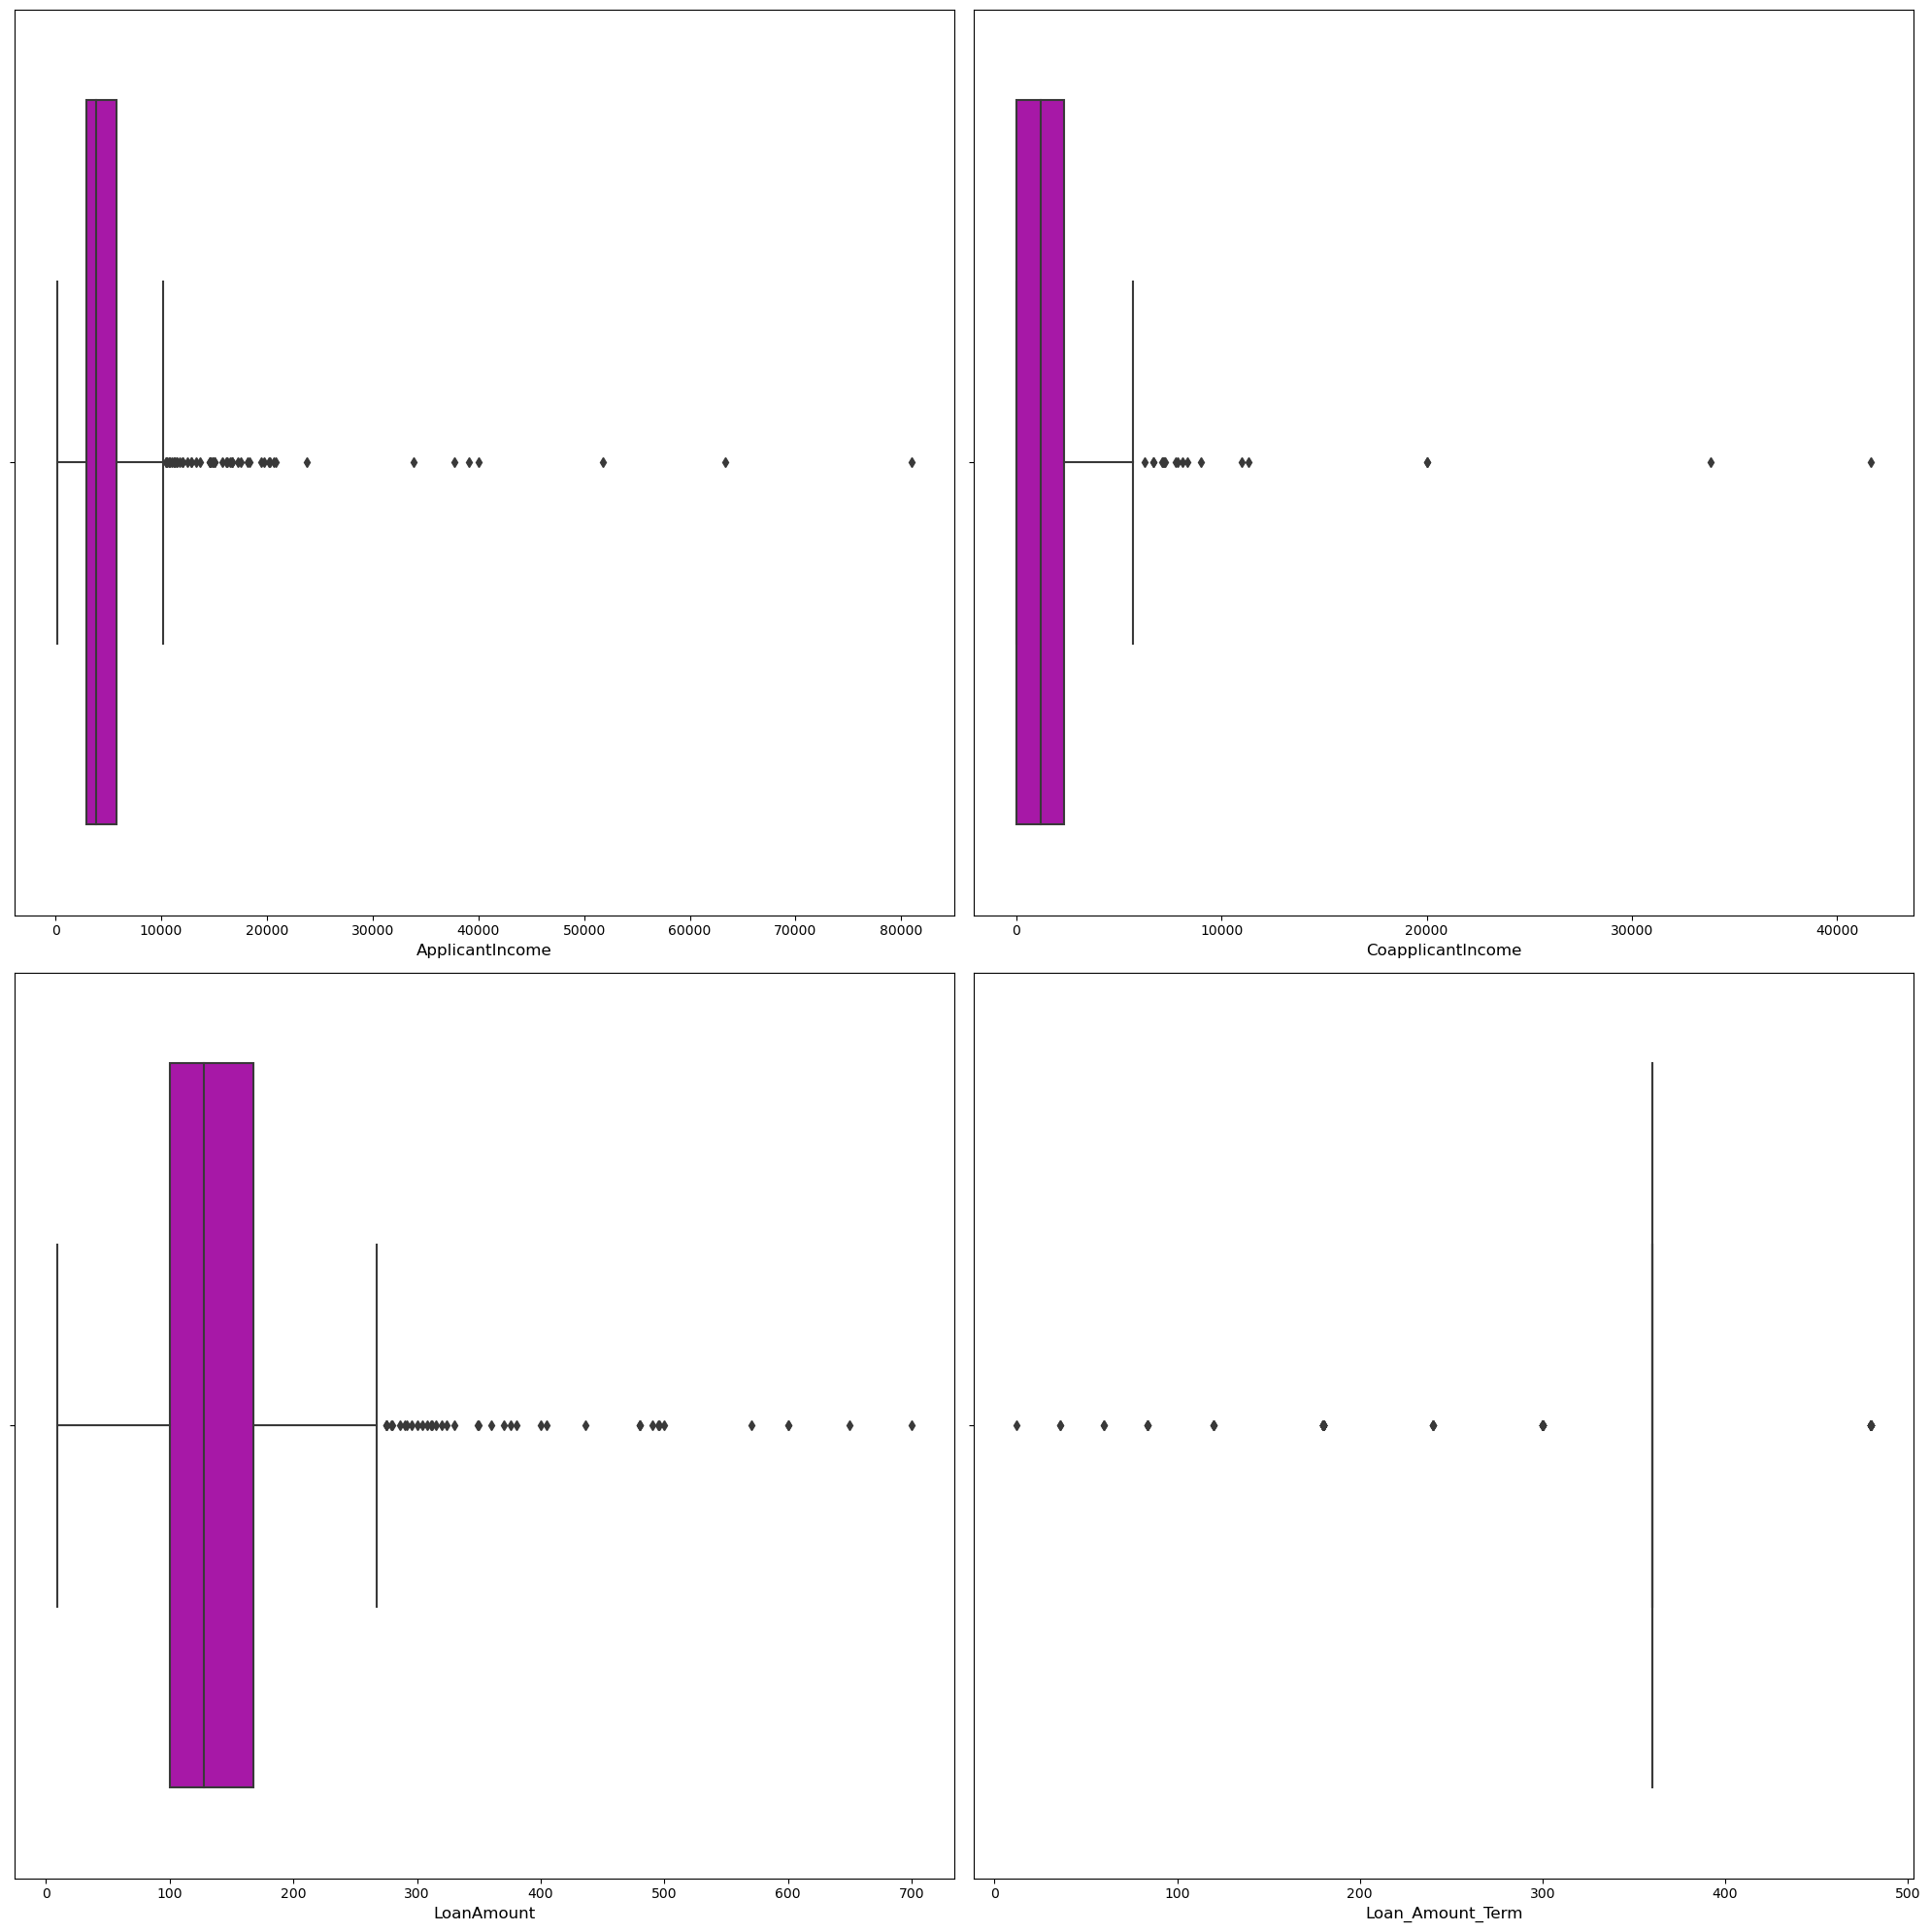

In [35]:
# Checking for outliners using box plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
numerical_columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'] #  numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+= 1

plt.tight_layout()
plt.show()

In [41]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)



In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [44]:
import numpy as np
from scipy.stats import zscore
out_feature=data[['ApplicantIncome','CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
z=np.abs(zscore(out_feature))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.411733
1,0.134412,0.038732,0.219273,0.279851,0.411733
2,0.393747,0.554487,0.957641,0.279851,0.411733
3,0.462062,0.251980,0.314547,0.279851,0.411733
4,0.097728,0.554487,0.064454,0.279851,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.411733
610,0.212557,0.554487,1.267279,2.518655,0.411733
611,0.437174,0.472404,1.269371,0.279851,0.411733
612,0.357064,0.554487,0.483367,0.279851,0.411733


In [45]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [46]:
z.iloc[9,1]

3.196712546212882

In [49]:
#removing the data above z score and ceating new data frame
#data1=data[(z<3).all(axis=1)]
#data1.shape

In [50]:
data.skew()# -05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12528\3786652358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()# -05 to +0.5


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

ApplicantIncome      
CoapplicantIncome   
LoanAmount           
Loan_Amount_Term    
Credit_History       
have skewness

In [51]:
import numpy as np

data['CoapplicantIncome'] = np.cbrt(data['CoapplicantIncome'])


In [52]:
data.skew()# -05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12528\3786652358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()# -05 to +0.5


ApplicantIncome      6.539513
CoapplicantIncome    0.196726
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


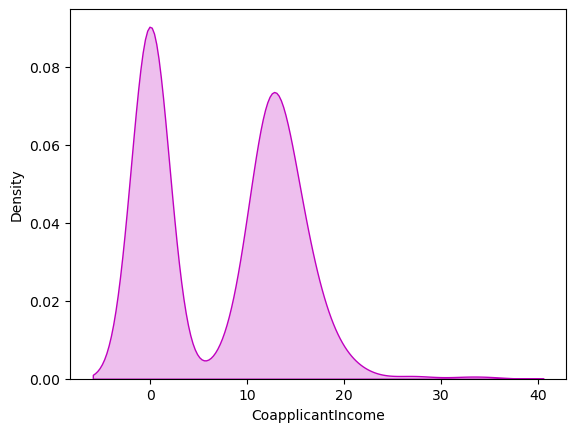

In [53]:
sns.distplot(data["CoapplicantIncome"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


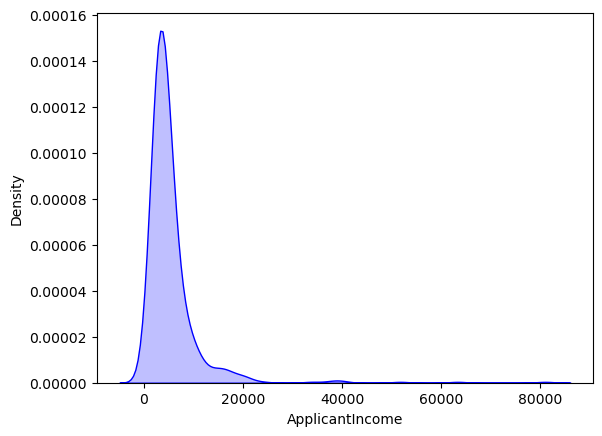

In [54]:
sns.distplot(data["ApplicantIncome"], color="b", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


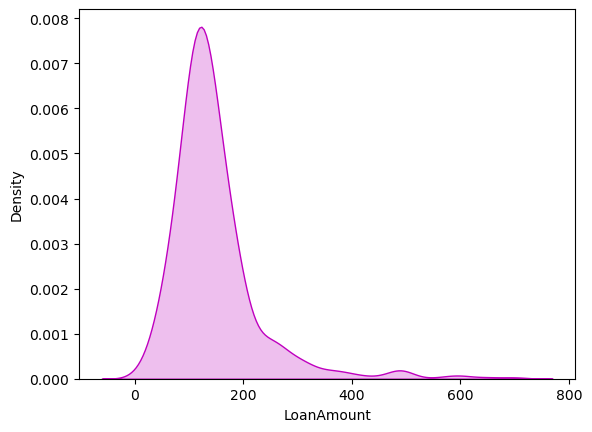

In [55]:
sns.distplot(data["LoanAmount"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


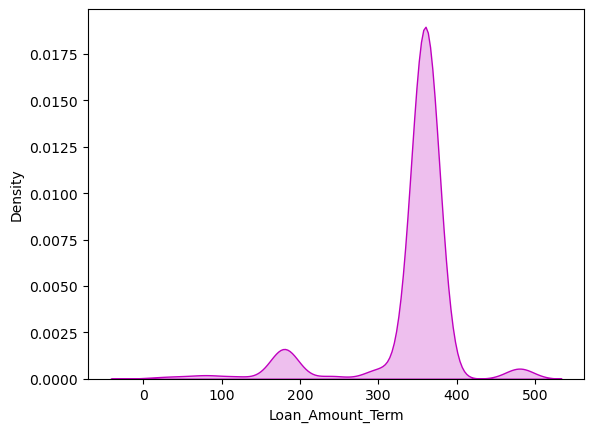

In [56]:
sns.distplot(data["Loan_Amount_Term"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


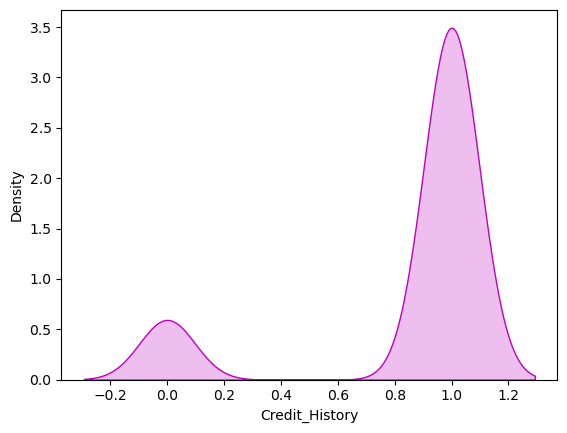

In [57]:
sns.distplot(data["Credit_History"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

binimial data

no skewnwess

Encoding Categorical Columns               
               



In [58]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.000000,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,11.467457,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.000000,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,13.310098,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.000000,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.000000,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.000000,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,6.214465,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.000000,187.000000,360.0,1.0,2.0,1.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 62.5 KB


In [61]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.813644,0.651391,0.762938,0.218241,0.140893,5403.459283,7.480926,146.412162,342.000000,0.855049,1.037459,0.687296
std,177.390811,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,7.108669,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,10.592145,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,13.194779,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,34.668156,700.000000,480.000000,1.000000,2.000000,1.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [62]:
corr=data.corr()
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.032244,-0.015031,0.054261,0.039442,0.032175,0.016925,-0.013743,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.032244,1.000000,0.369612,0.175970,0.049258,-0.009829,0.053989,0.211056,0.105462,-0.074134,0.011878,-0.024556,0.019857
Married,-0.015031,0.369612,1.000000,0.343417,0.014223,0.001909,0.051332,0.283247,0.146981,-0.102600,0.009481,0.002918,0.089280
Dependents,0.054261,0.175970,0.343417,1.000000,0.059161,0.057867,0.118679,-0.008289,0.161142,-0.099589,-0.051726,0.006828,0.006781
Education,0.039442,0.049258,0.014223,0.059161,1.000000,-0.012333,-0.140760,0.010615,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032175,-0.009829,0.001909,0.057867,-0.012333,1.000000,0.140826,-0.074975,0.121649,-0.036624,0.005495,-0.031214,-0.002303
ApplicantIncome,0.016925,0.053989,0.051332,0.118679,-0.140760,0.140826,1.000000,-0.229695,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,-0.013743,0.211056,0.283247,-0.008289,0.010615,-0.074975,-0.229695,1.000000,0.103990,-0.003778,0.005038,-0.052318,0.033582
LoanAmount,0.035684,0.105462,0.146981,0.161142,-0.166998,0.121649,0.565620,0.103990,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.074134,-0.102600,-0.099589,-0.077242,-0.036624,-0.045242,-0.003778,0.038801,1.000000,0.000432,-0.077620,-0.020974


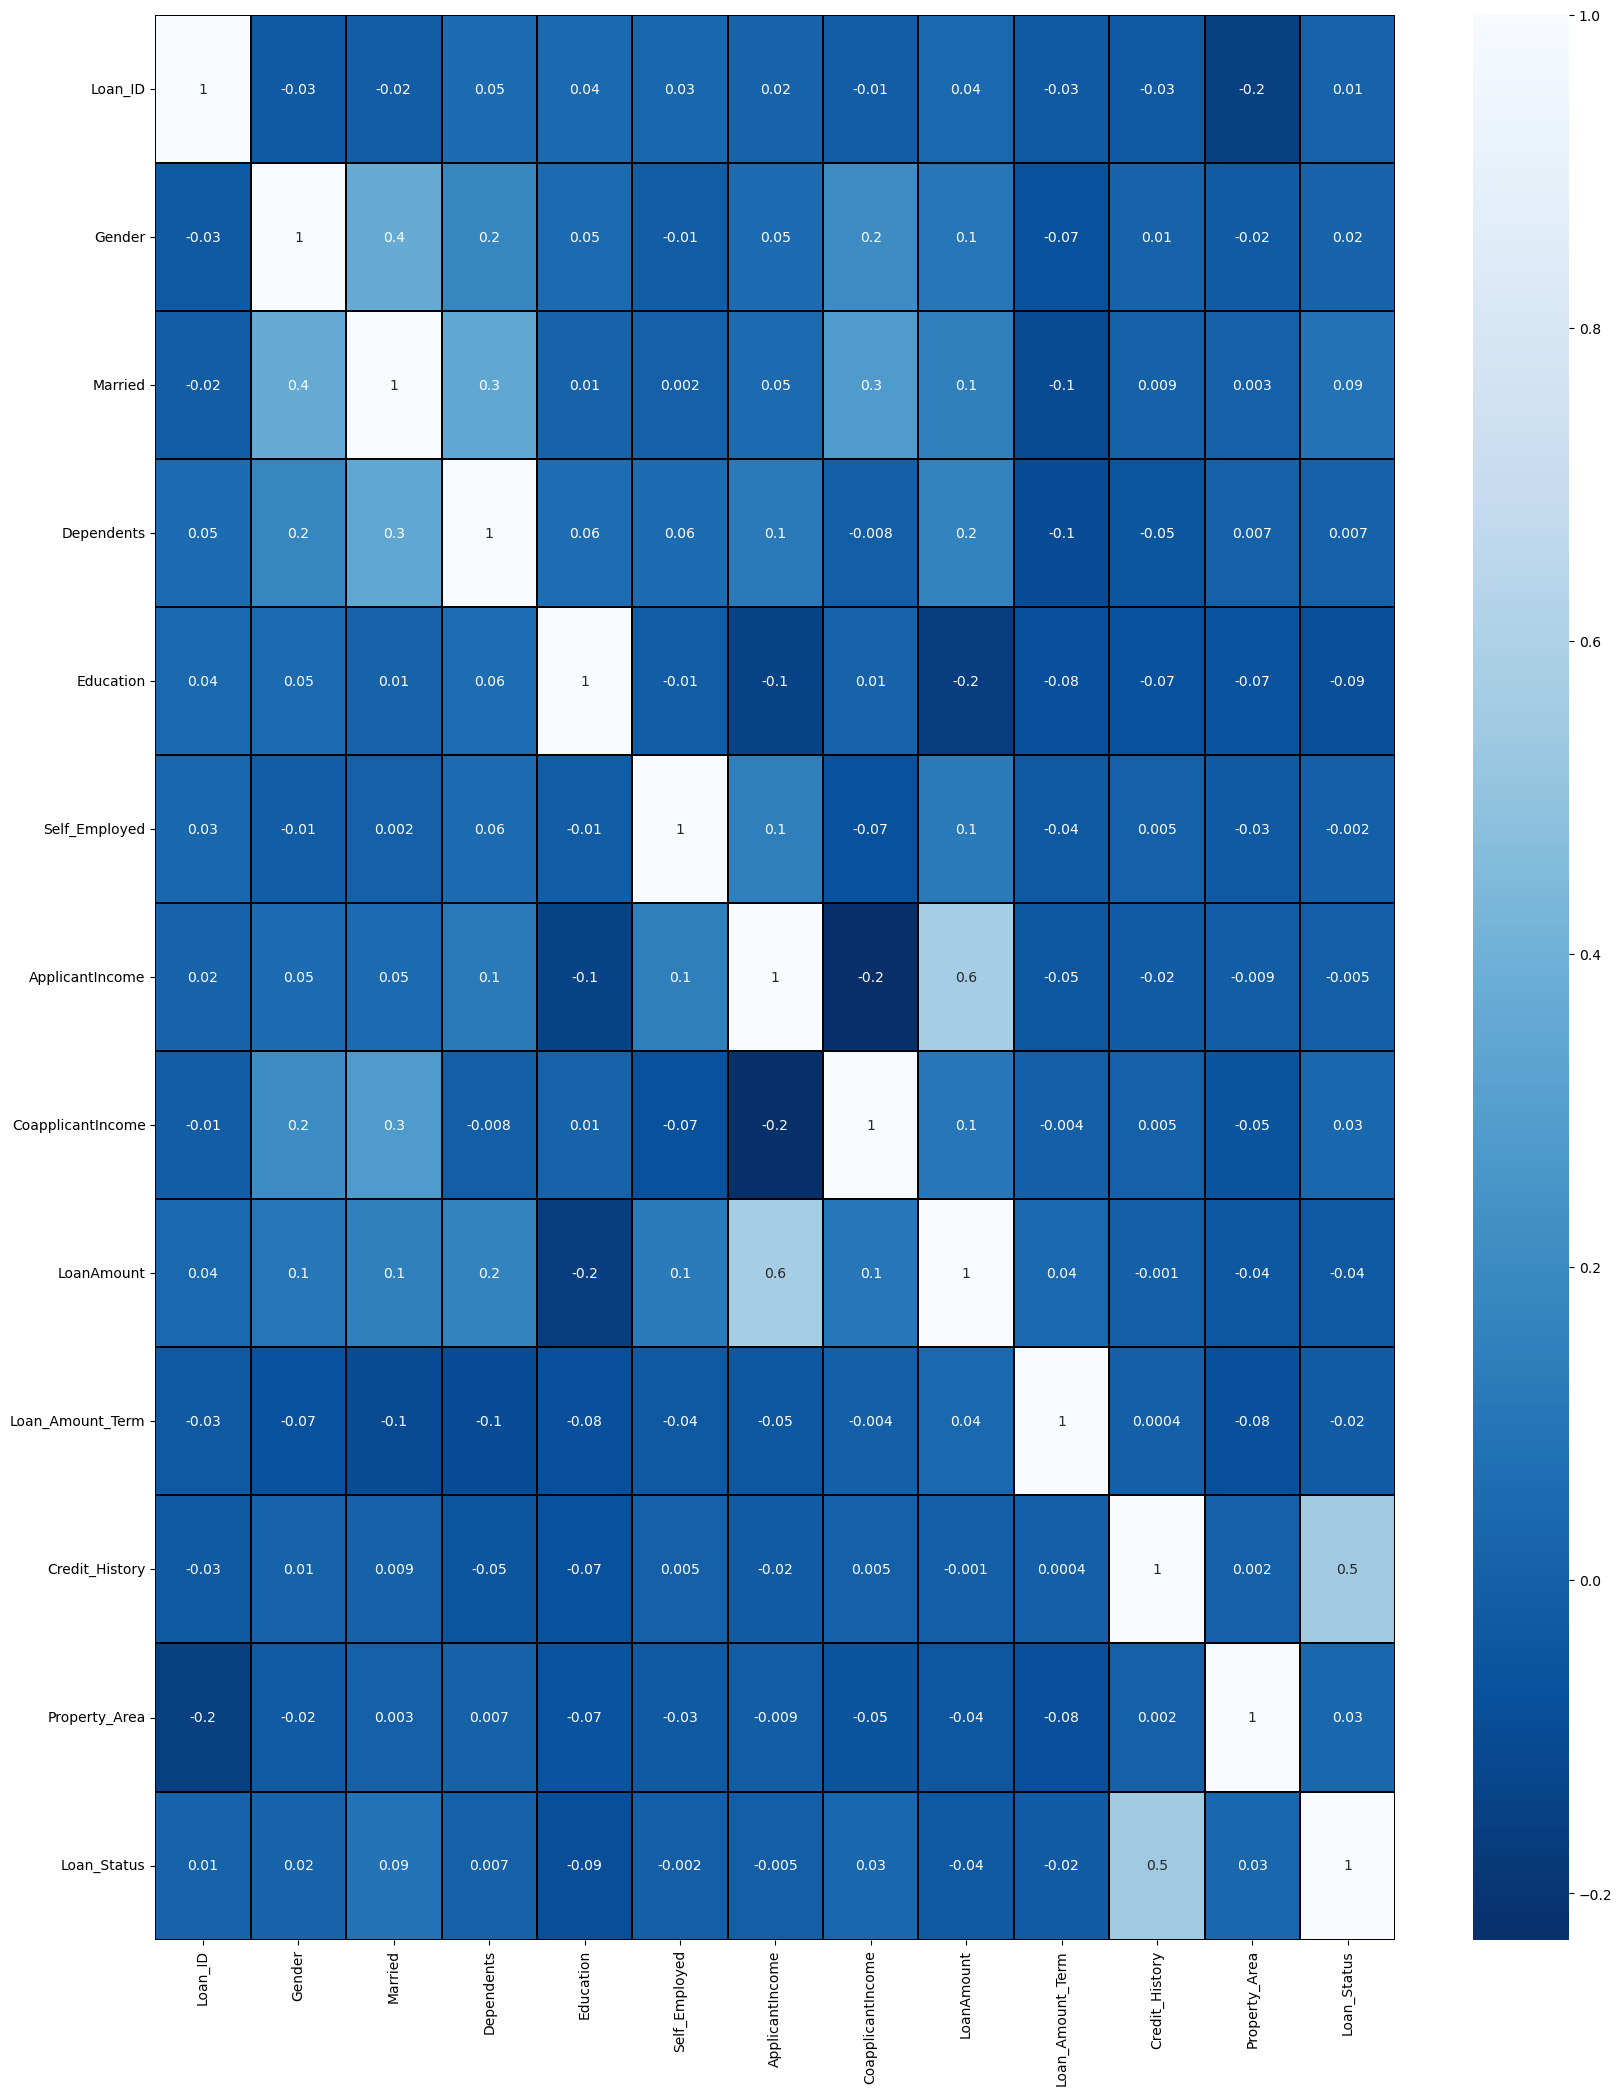

In [63]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. tOTAL VOLUME AND 4225 AND LARGE BAG HAVE POSITIVE CORELATION WITH TARGET. tYPE HAS HIGH CORELATION. 

In [64]:
corr["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.089280
CoapplicantIncome    0.033582
Property_Area        0.032112
Gender               0.019857
Loan_ID              0.011773
Dependents           0.006781
Self_Employed       -0.002303
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
Education           -0.085884
Name: Loan_Status, dtype: float64

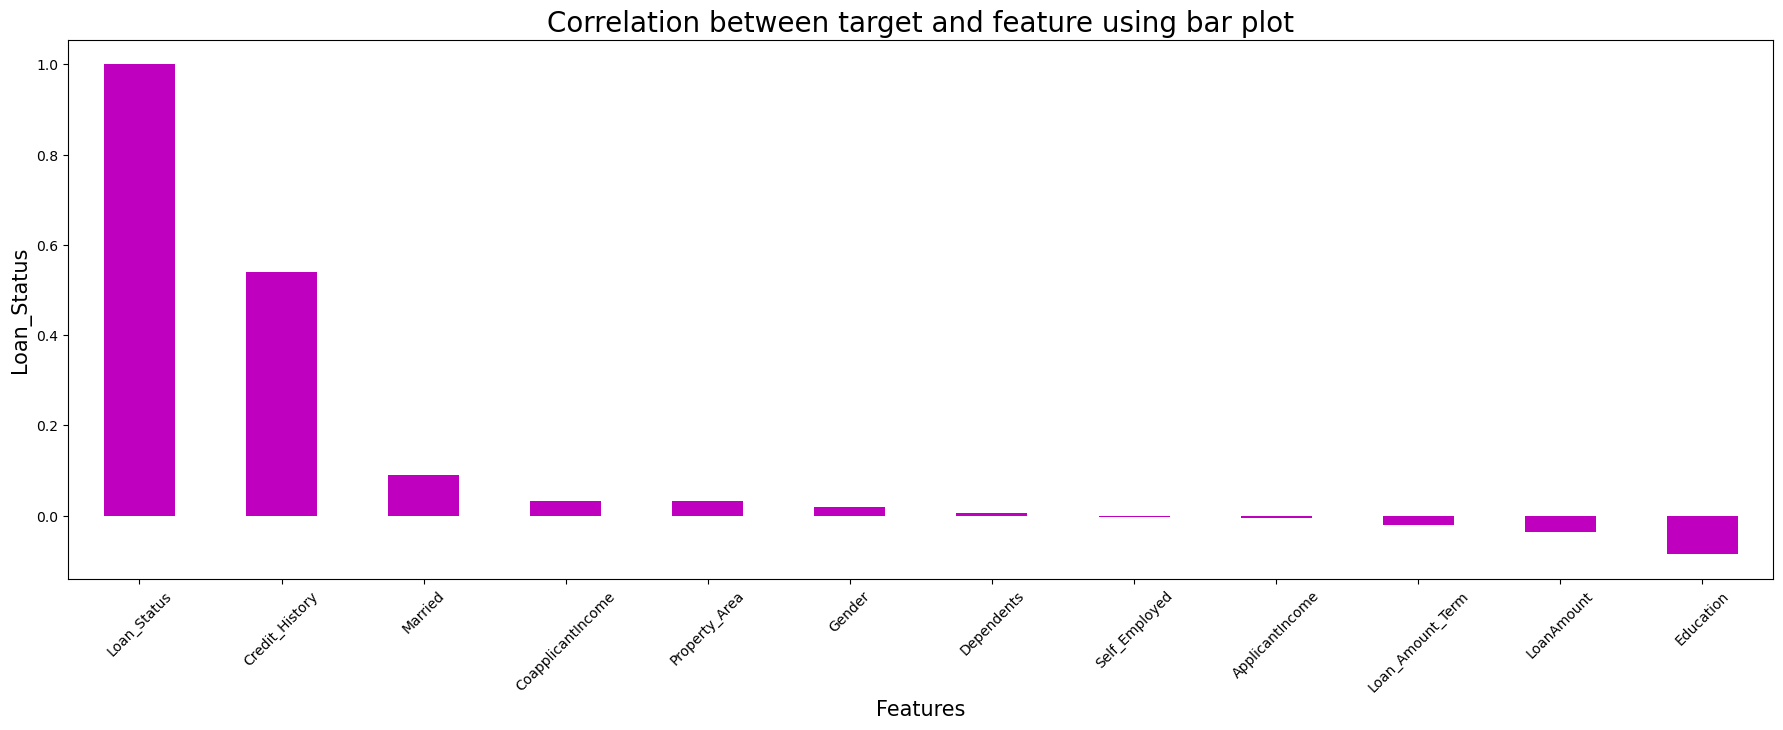

In [67]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["Loan_Status"].sort_values(ascending=False).drop(["Loan_ID"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("Loan_Status", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

In [68]:
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.478580,-1.366947,-0.752131,-0.528362,-0.404969,0.072991,-1.053225,0.000000,0.279851,0.411733,1.223298
1,-1.723590,0.478580,0.731557,0.233704,-0.528362,-0.404969,-0.134412,0.561256,-0.219273,0.279851,0.411733,-1.318513
2,-1.717948,0.478580,0.731557,-0.752131,-0.528362,2.469324,-0.393747,-1.053225,-0.957641,0.279851,0.411733,1.223298
3,-1.712307,0.478580,0.731557,-0.752131,1.892641,-0.404969,-0.462062,0.820678,-0.314547,0.279851,0.411733,1.223298
4,-1.706665,0.478580,-1.366947,-0.752131,-0.528362,-0.404969,0.097728,-1.053225,-0.064454,0.279851,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.089515,-1.366947,-0.752131,-0.528362,-0.404969,-0.410130,-1.053225,-0.898095,0.279851,0.411733,-1.318513
610,1.712307,0.478580,0.731557,2.205374,-0.528362,-0.404969,-0.212557,-1.053225,-1.267279,-2.518655,0.411733,-1.318513
611,1.717948,0.478580,0.731557,0.233704,-0.528362,-0.404969,0.437174,-0.178302,1.269371,0.279851,0.411733,1.223298
612,1.723590,0.478580,0.731557,1.219539,-0.528362,-0.404969,0.357064,-1.053225,0.483367,0.279851,0.411733,1.223298


CHECKING VARIANCE INFLATION(VIF)

In [71]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)


MissingDataError: exog contains inf or nans

years with the company has highest VIF Terefore it is dropped first

In [63]:
# dropping date column
x.drop("Date",axis=1,inplace=True)

In [65]:


# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)

         Feature        VIF
0     Unnamed: 0   1.069927
1   AveragePrice   1.843507
2   Total Volume  35.382609
3           4046  11.068798
4           4225   9.435315
5           4770   4.657354
6     Total Bags  11.855958
7     Small Bags  20.599337
8     Large Bags   4.198227
9    XLarge Bags   2.810318
10          type   2.864332
11          year   1.353623


In [66]:
y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

The data is not balanced since it is a classification problem

In [67]:

# oversampling
from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)


In [68]:
# Checking value count of target column
y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    338
Name: region, dtype: int64

data is balanced

MODELLING

In [73]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['region']  # Target variable
maxAcc = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)




Best Accuracy is 0.9283973758200562 on random state 138


In [ ]:
# cREATING TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score






In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(x_train, np.array(y_train))
pred_RFC = RFC.predict(x_test)
pred_train = RFC.predict(x_train)
print(accuracy_score(y_test, pred_RFC))
print(confusion_matrix(y_test, pred_RFC))



0.9160262417994377
[[104   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  53   0   0]
 [  0   0   0 ...   1  72   0]
 [  0   0   0 ...   0   0  89]]


In [77]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.15745079662605435
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  6  4  0]
 [ 0  0 38 ...  1  0  0]
 ...
 [ 0  0  0 ... 36  9  0]
 [ 0  0  0 ... 15 23  0]
 [ 0  0  1 ...  8  4  5]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.00      0.00      0.00        88
         2.0       0.33      0.37      0.35       103
         3.0       0.00      0.00      0.00       105
         4.0       0.16      0.08      0.10       104
         5.0       0.07      0.33      0.12        96
         6.0       0.15      0.33      0.20        92
         7.0       0.06      0.01      0.02       111
         8.0       0.85      0.46      0.60       112
         9.0       0.12      0.41      0.19       111
        10.0       0.00      0.00      0.00        95
        11.0       0.15      0.02      0.03       106
        12.0       0.18      0.49      0.26        92
        13.0       0.34      0.32      0.33       103
        14.0 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [78]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train=svc.predict(x_train)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.24179943767572634
[[ 0  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  1]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 30  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  3  0 ...  0  0 38]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.45      0.34      0.39        88
         2.0       0.87      0.40      0.55       103
         3.0       0.00      0.00      0.00       105
         4.0       0.70      0.29      0.41       104
         5.0       0.09      0.31      0.14        96
         6.0       0.83      0.33      0.47        92
         7.0       0.41      0.08      0.14       111
         8.0       0.98      0.46      0.62       112
         9.0       0.54      0.23      0.33       111
        10.0       0.28      0.15      0.19        95
        11.0       0.73      0.30      0.43       106
        12.0       0.70      0.35      0.46        92
        13.0       0.45      0.29      0.35       103
        14.0 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
pred_train=GB.predict(x_train)

print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8296157450796626
[[95  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  2]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  4  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  0  0 ...  0  0 81]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       112
         1.0       0.64      0.77      0.70        88
         2.0       0.95      0.88      0.91       103
         3.0       0.86      0.82      0.84       105
         4.0       0.87      0.83      0.85       104
         5.0       0.73      0.77      0.75        96
         6.0       0.93      0.90      0.92        92
         7.0       0.91      0.93      0.92       111
         8.0       0.98      0.84      0.90       112
         9.0       0.84      0.83      0.83       111
        10.0       0.68      0.76      0.72        95
        11.0       0.82      0.76      0.79       106
        12.0       0.92      0.92      0.92        92
        13.0       0.82      0.80      0.81       103
        14.0  

In [80]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.048359887535145266
[[ 0  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0 44  0 ...  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.02      0.44      0.04        88
         2.0       0.00      0.00      0.00       103
         3.0       0.00      0.00      0.00       105
         4.0       0.19      0.19      0.19       104
         5.0       0.00      0.00      0.00        96
         6.0       0.00      0.00      0.00        92
         7.0       0.00      0.00      0.00       111
         8.0       0.00      0.00      0.00       112
         9.0       0.00      0.00      0.00       111
        10.0       0.03      0.48      0.06        95
        11.0       0.00      0.00      0.00       106
        12.0       0.04      0.14      0.06        92
        13.0       0.00      0.00      0.00       103
        14.0

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
pred_train=BC.predict(x_train)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

0.8639175257731959
[[ 93   0   0 ...   0   0   0]
 [  0  70   0 ...   0   0   0]
 [  0   0 100 ...   0   0   2]
 ...
 [  0   0   0 ...  53   0   0]
 [  0   0   0 ...   1  68   0]
 [  0   1   0 ...   0   0  75]]
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       112
         1.0       0.68      0.80      0.73        88
         2.0       0.85      0.97      0.90       103
         3.0       0.89      0.81      0.85       105
         4.0       0.92      0.93      0.92       104
         5.0       0.80      0.81      0.80        96
         6.0       0.97      0.95      0.96        92
         7.0       0.92      0.94      0.93       111
         8.0       0.94      0.91      0.93       112
         9.0       0.89      0.87      0.88       111
        10.0       0.68      0.80      0.73        95
        11.0       0.88      0.86      0.87       106
        12.0       0.93      0.91      0.92        92
        13.0       0.76      0.8

In [82]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.9117150890346767
[[109   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   1]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  53   0   0]
 [  0   0   0 ...   1  73   0]
 [  0   0   0 ...   0   0  93]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       112
         1.0       0.86      0.91      0.88        88
         2.0       0.96      0.97      0.97       103
         3.0       0.96      0.88      0.92       105
         4.0       0.94      0.99      0.97       104
         5.0       0.88      0.83      0.86        96
         6.0       1.00      0.98      0.99        92
         7.0       0.95      0.94      0.95       111
         8.0       0.97      0.96      0.97       112
         9.0       0.87      0.86      0.86       111
        10.0       0.83      0.82      0.83        95
        11.0       0.92      0.95      0.94       106
        12.0       0.93      0.93      0.93        92
        13.0       0.87      0.8

In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.63845938 0.80770312 0.74915636 0.69741282 0.49690664]
0.6779276624017724
difference between ACCURACY score and cross validation score is - 23.80985793976653


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_GB)-score.mean())*100)

In [148]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_svc)-score.mean())*100)

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817
difference between ACCURACY score and cross validation score is - -1.3378684807256347


In [149]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_ABC)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between ACCURACY score and cross validation score is - 0.0


In [150]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_BC)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between ACCURACY score and cross validation score is - 0.0


In [152]:

score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(accuracy_score(y_test,pred_ET)-score6.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between r2 score and cross validation score is - 0.0


HYPER PARAMETER TUNING

In [154]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion': ['gini','entropy'],
    'random_state': [10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 428, in _process_worker
    r = call_item()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 620, in __call__
   

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [157]:
best_params = gscv.best_params_
print(best_params)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50, 'n_jobs': -2, 'random_state': 10}


In [161]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)


In [164]:
from sklearn.metrics import accuracy_score

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)


100.0


PLOTTING ROC AND COMPARE AUC FOR MODELS

In [165]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: predict_proba() missing 1 required positional argument: 'X'

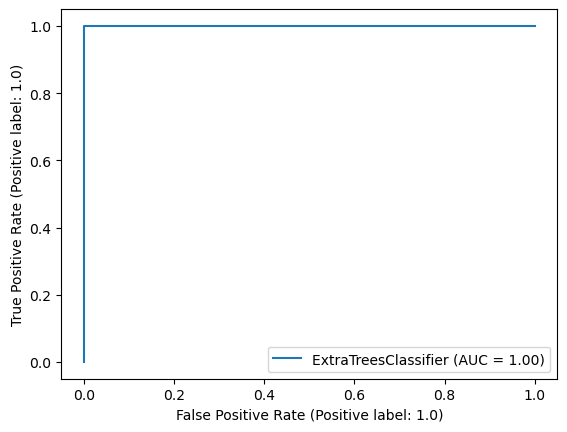

In [167]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(Final_model, x_test, y_test)
plot_roc_curve(RandomForestClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LogisticRegression, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GradientBoostingClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(AdaBoostClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BaggingClassifier, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()


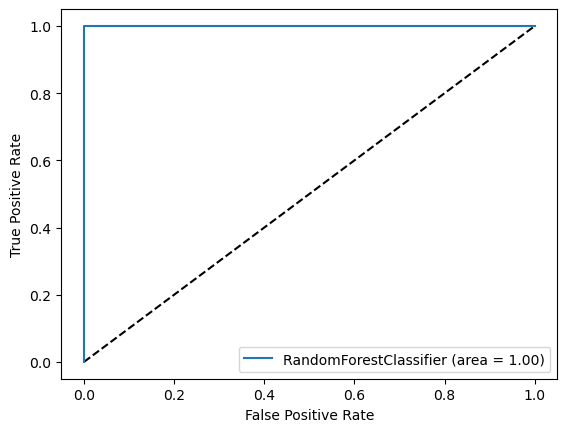

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = Final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [172]:
import joblib

joblib.dump(Final_model, 'Attrition.pkl')

model = joblib.load('Attrition.pkl')

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a

